<a href="https://colab.research.google.com/github/Hongjieun123/deeplearning-project/blob/master/%EB%B9%88%EB%8F%84%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 구글 드라이브와 연결
# from google.colab import auth
# auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# 그래프에서 한글표현을 위해 폰트를 설치(잘 안된다.)
%config InlineBackend.figure_format = 'retina'   # 폰트가 깨끗하게 보이도록 설정
!apt-get -qq -y install fonts-nanum > /dev/null      # 나눔 폰트 설치

import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

In [3]:
# 형태소분석기 관련 설치
!apt-get update
!apt-get install g++ openjdk-8-jdk

!pip install JPype1==0.7.4
!pip install rhinoMorph

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:3 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:9 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:13 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
g++ is 

In [4]:
# 경로 변경
%cd /content/gdrive/My\ Drive/pytest/  #별도의 셀에서 실행해줘야 된다

/content/gdrive/My Drive/pytest


In [0]:
# 데이터 로딩
def read_data(filename, encoding='cp949'):                # 읽기 함수 정의 , 한국어 사용하는 거 : euc-kr(ANSI이랑 거의 비슷), ANSI -> euc-kr의 약간 확장판, cp949 -> euc-kr의 약간 확장판 euc-kr = cp949(ms949) = ANSI/ utf8 -> 세계의 모든 언어를 다담음.
  with open(filename, 'r', encoding=encoding) as f:
    data = [line.split('\t') for line in f.read().splitlines()] 
    data = data[1:]                 # txt 파일의 헤더(id, document, label)는 제외하기
  return data

def write_data(data, filename, encoding='cp949'):         # 쓰기 함수도 정의
  with open(filename, 'w', encoding=encoding) as f:
    f.write(data)

data = read_data('ratings_small.txt', encoding='cp949')  # 전체파일은 ratings.txt (긍정 1만, 부정 1만)

In [6]:
# 데이터 확인
print(len(data)) #500행
print(len(data[0])) 
print(data[0])
print(data[0:3])

500
3
['8112052', '어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '1']
[['8112052', '어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '1'], ['8132799', '"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다."', '1'], ['4655635', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '1']]


In [7]:
# 샘플 데이터 분석 연습

import rhinoMorph
rn = rhinoMorph.startRhino()
# 형태소 분석된 문장 샘플 보기
sample_data = rhinoMorph.onlyMorph_list(rn, data[0][1], pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=True) #data[0][1] 쓰는 이유: data[0][0] = 아이디 , data[0][1] = 안녕하세요, data[0][2] = 1 

print('sample data:', sample_data)				            # 형태소 분석 결과
print('joined sample data:', ' '.join(sample_data))	  # 문자열을 공백으로 연결한다, 영어와 유사한 형태가 되었다.

filepath:  /usr/local/lib/python3.6/dist-packages
classpath:  /usr/local/lib/python3.6/dist-packages/rhinoMorph/lib/rhino.jar
RHINO started!
sample data: ['어리다', '때', '보다', '지금', '다시', '보다', '재미있다', 'ㅋㅋ']
joined sample data: 어리다 때 보다 지금 다시 보다 재미있다 ㅋㅋ


In [0]:
# 전체 데이터 형태소 분석

morphed_data = ''
for data_each in data:
  morphed_data_each = rhinoMorph.onlyMorph_list(rn, data_each[1], pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=True)
  joined_data_each = ' '.join(morphed_data_each)			        # 문자열을 하나로 연결
  if joined_data_each:                                      	# 내용이 있는 경우만 저장하게 함
    morphed_data += data_each[0]+"\t"+joined_data_each+"\t"+data_each[2]+"\n" #data_each[0] 은 아이디, data_each[2] 라벨
    
# 형태소 분석된 파일 저장
write_data(morphed_data, 'ratings_morphed.txt', encoding='cp949')

In [0]:
print(morphed_data)

In [21]:
# 기분석된 데이터 로딩

data = read_data('ratings_morphed.txt', encoding='cp949')
print(len(data))                              # 일부는 내용이 남지 않아 제외 됨('bbb' 같은거)
print(len(data[0]))                           # 3개의 컬럼

data_text = [line[1] for line in data]      	# 데이터 본문
data_senti = [line[2] for line in data]     	# 데이터 긍부정 부분 (1은 긍정, 0은 부정)

197447
3


In [22]:
# counter 연습
from collections import Counter
count = Counter(["여름", "과일", "딸기", "과일", "딸기"])
result = count.most_common(2)

print(result)
print(result[0]) #2번쓰인 거에서 ㄱㄴㄷ순으로 (튜플 출력)
print(result[0][0])		# 0 번째 요소의 0 번째
print(result[0][1])		# 0 번째 요소의 1 번째

[('과일', 2), ('딸기', 2)]
('과일', 2)
과일
2


In [30]:
# 분석된 데이터 빈도 구하기
print('data_text:', data_text)

mergedText = ' '.join(data_text)         	# 좋은 방법. 공백을 추가하며 모든 리스트 요소들을 결합한다
print('mergedText:', mergedText)

mergedTextList = mergedText.split(' ')   	# 결합된 요소들을 공백 단위로 분리하여 하나의 리스트로 만든다
print('mergedTextList:', mergedTextList)

wordInfo = Counter(mergedTextList)  	    # 하나의 리스트로 결합된 요소를 카운트한다 (내림차순)
print('wordInfo:', wordInfo)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [29]:
print('wordInfo:', wordInfo)

wordInfo: Counter({'영화': 73026, '보': 49737, '하': 37953, '없': 20501, 'ㅋㅋ': 19523, '재미있': 18697, '좋': 16240, '너무': 15553, '있': 13058, '정말': 12859, '진짜': 11177, '같': 11088, '되': 10896, '만들': 9316, '안': 9264, '주': 8845, '나오': 8786, '연기': 8715, '최고': 8703, '말': 8656, '평점': 8333, '다': 7930, 'ㅋ': 7830, '가': 7357, '왜': 7238, '이': 7194, '잘': 7070, '이런': 7040, '스토리': 6922, '때': 6587, '드라마': 6458, '사람': 6270, '더': 6171, '배우': 6061, '내용': 5535, '좀': 5493, '알': 5491, '아깝': 5414, '그냥': 5404, '감독': 5290, '재미': 5099, '지루하': 5001, '시간': 4847, 'ㅠㅠ': 4783, '재미없': 4755, '감동': 4441, '쓰레기': 4374, '모르': 4121, '다시': 4104, '처음': 3932, '생각': 3902, '작품': 3846, '^^': 3827, '들': 3805, '아': 3737, '마지막': 3619, '그': 3584, '액션': 3558, '못하': 3465, '많': 3402, '완전': 3365, '참': 3315, '수': 3280, '오': 3215, '정도': 3176, '느끼': 3151, '이렇게': 3074, '못': 3068, 'ㅎㅎ': 3015, '최악': 3001, '생각하': 2964, '쓰': 2949, '지금': 2926, '돈': 2903, '느낌': 2900, '무슨': 2894, '10점': 2886, '장면': 2876, '끝': 2851, '사랑': 2813, '이야기': 2767, '보이': 2723, '별로'

In [27]:
# sorted 연습
sample = {'여름':1, '과일':2, '딸기':3}

print(sorted(sample))
print(sorted(sample, reverse=True))                     # 역순으로 정렬한다
print(sorted(sample, key=sample.get, reverse=True))     # sample.get의 출력된 값을 기준으로 sample을 정렬한다

print(sorted(sample.values(), reverse=True))

['과일', '딸기', '여름']
['여름', '딸기', '과일']
['딸기', '과일', '여름']
[3, 2, 1]


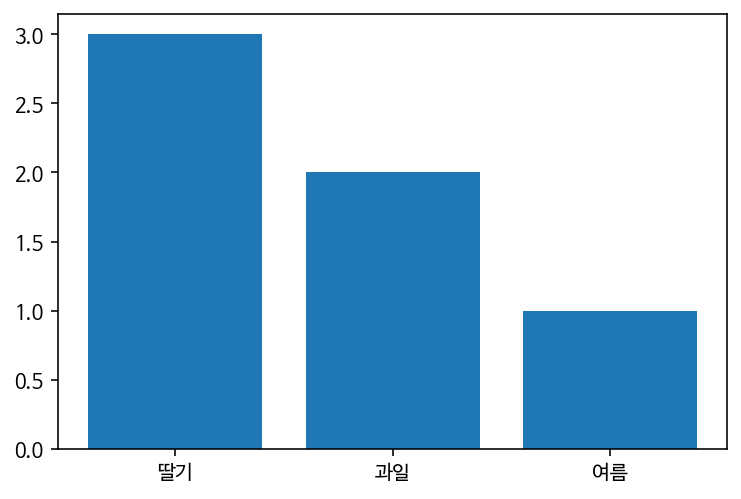

In [28]:
# bar 그래프 연습
wordInfo_sample = Counter({'여름':1, '과일':2, '딸기':3})
sorted_keys_sample = sorted(wordInfo_sample, key=wordInfo_sample.get, reverse=True)
sorted_values_sample = sorted(wordInfo_sample.values(), reverse=True)

import matplotlib.pyplot as plt
plt.bar(range(len(wordInfo_sample)), sorted_values_sample)	  # X축의 위치, 각 x의 높이
plt.xticks(range(len(wordInfo_sample)), sorted_keys_sample)  	# X축의 위치, 각 x의 라벨
plt.show()

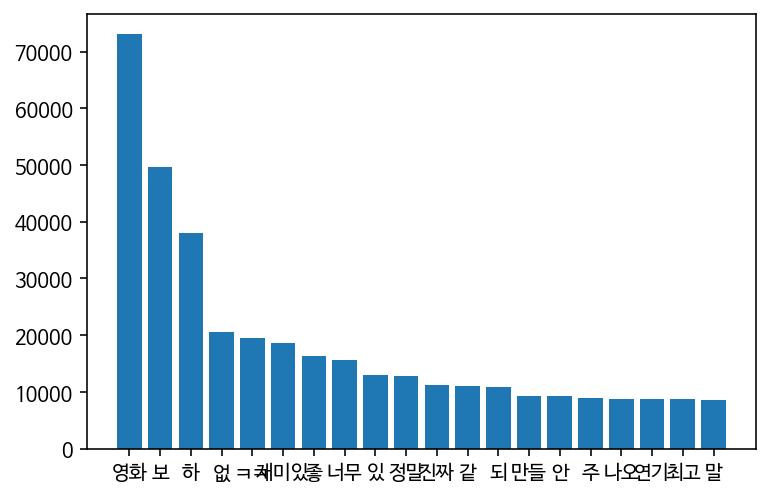

In [31]:
# 앞에서 20개까지만 출력 (전체를 그리게 되면 제대로 나타나지 않아서)
sorted_keys = sorted(wordInfo, key=wordInfo.get, reverse=True)
sorted_values = sorted(wordInfo.values(), reverse=True)

import matplotlib.pyplot as plt
plt.bar(range(20), sorted_values[:20])
plt.xticks(range(20), sorted_keys[:20])
plt.show()

In [32]:
# data_text는 각 문장을 리스트 원소로 담고 있다 
# 각 문장 리스트 원소는 공백으로 분리되어 있다
print(data_text)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



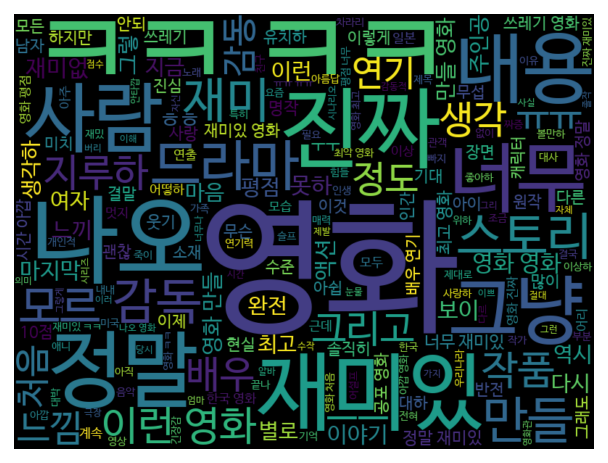

In [35]:
from wordcloud import WordCloud
cloud = WordCloud(font_path=fontpath, width=800, height=600).generate(" ".join(data_text))
plt.imshow(cloud, interpolation='bilinear')   # 글자를 더 부드럽게 나오게 한다
plt.axis('off')
plt.show()

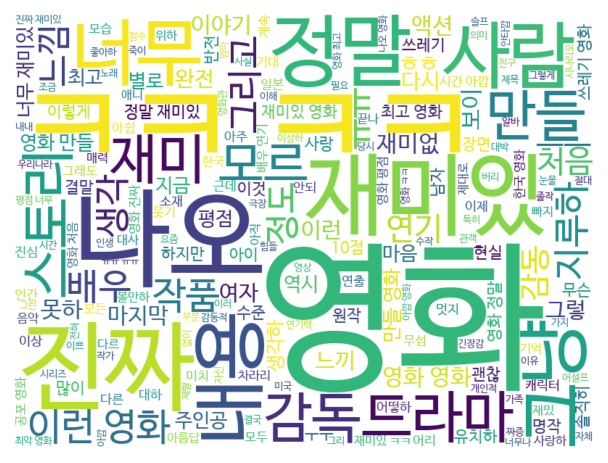

In [36]:
# 워드 클라우드 배경 바꾸기
cloud = WordCloud(font_path=fontpath, width=800, height=600, background_color='white').generate(" ".join(data_text))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()